In [12]:
import matplotlib.pyplot as plt
from anemoi.datasets import open_dataset
import cartopy
import cartopy.crs as ccrs
import cmocean
import xarray as xr
import numpy as np

In [3]:
year = 2013
path = '/lustre/storeB/project/fou/hi/foccus/datasets/'
file = f'norkystv3_hindcast_{year}_surface.zarr'
ds = open_dataset(path+file, select='temperature_0')

In [6]:
path_nk = f'/lustre/storeB/project/fou/hi/foccus/datasets/symlinks/norkystv3-hindcast/{year}/'
file_nk = f'norkyst800-{year}0101.nc'
nk = xr.open_dataset(path_nk+file_nk)

Text(0.5, 1.0, '$Temp$')

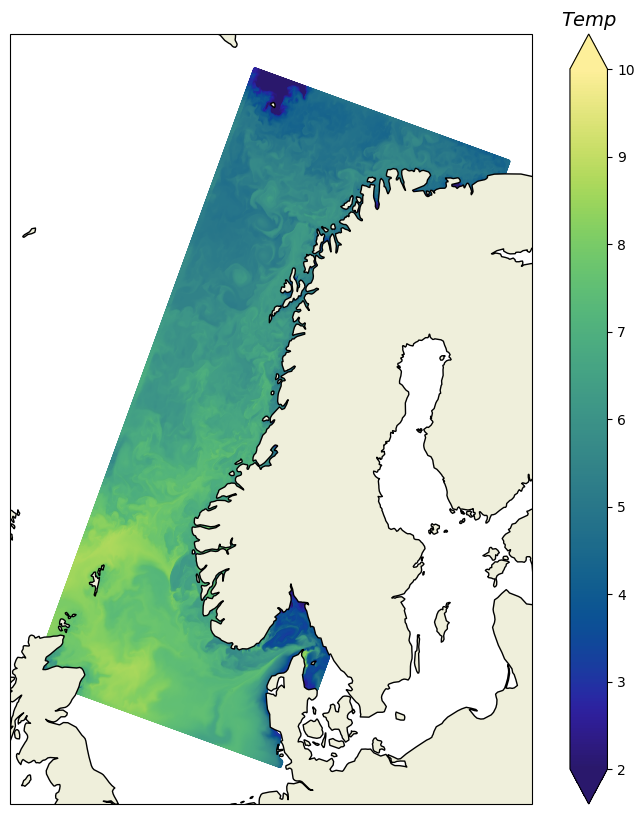

In [13]:
fig, ax = plt.subplots(figsize=(15,10), subplot_kw={'projection': ccrs.NorthPolarStereo()})
im = ax.scatter(nk.lon, nk.lat, c=nk.temperature.isel(time=0, s_rho=-1), s=2, vmin=2, vmax=10, cmap=cmocean.cm.haline, transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
cax = fig.add_axes([ax.get_position().x1+0.025, ax.get_position().y0, 0.025, ax.get_position().height])
cbar = fig.colorbar(im, ax=ax, cax=cax, extend='both')
cbar.ax.set_title('$Temp$', fontsize=14)

In [ ]:
for i in [0,3,6,12,24]:
    diff = np.array(nk.temperature.isel(time=i, s_rho=-1)).flatten() - np.array(ds[i,0,0,:])
    fig, ax = plt.subplots(figsize=(15,10), subplot_kw={'projection': ccrs.NorthPolarStereo()})
    im = ax.scatter(nk.lon, nk.lat, c=diff, s=2, vmin=-1, vmax=1, cmap='bwr', transform=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
    cax = fig.add_axes([ax.get_position().x1+0.025, ax.get_position().y0, 0.025, ax.get_position().height])
    cbar = fig.colorbar(im, ax=ax, cax=cax, extend='both')
    cbar.ax.set_title('$Temp$', fontsize=14)
    ax.set_title(f'diff +{i}h from {year}-01-01T00:00:00')
    plt.savefig(f'diff_{i}.png')

KeyboardInterrupt: 

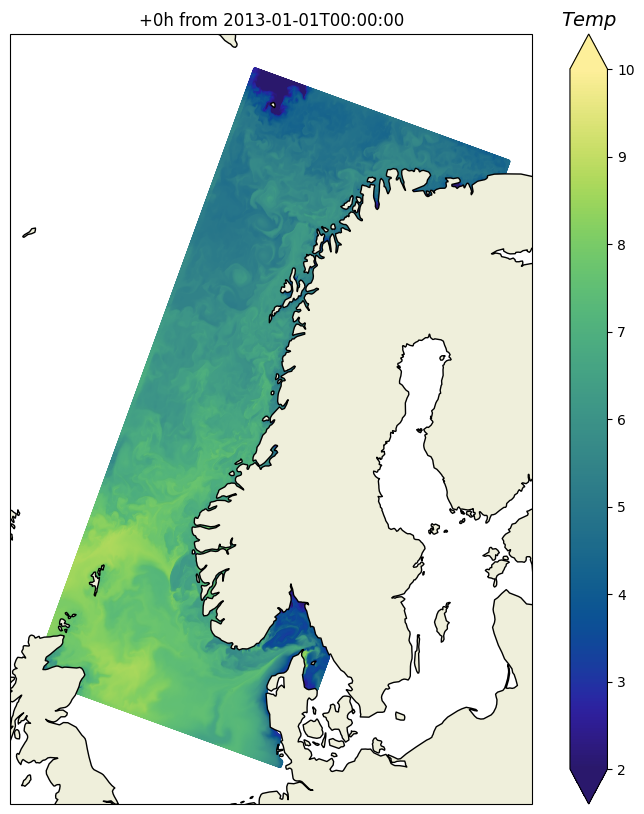

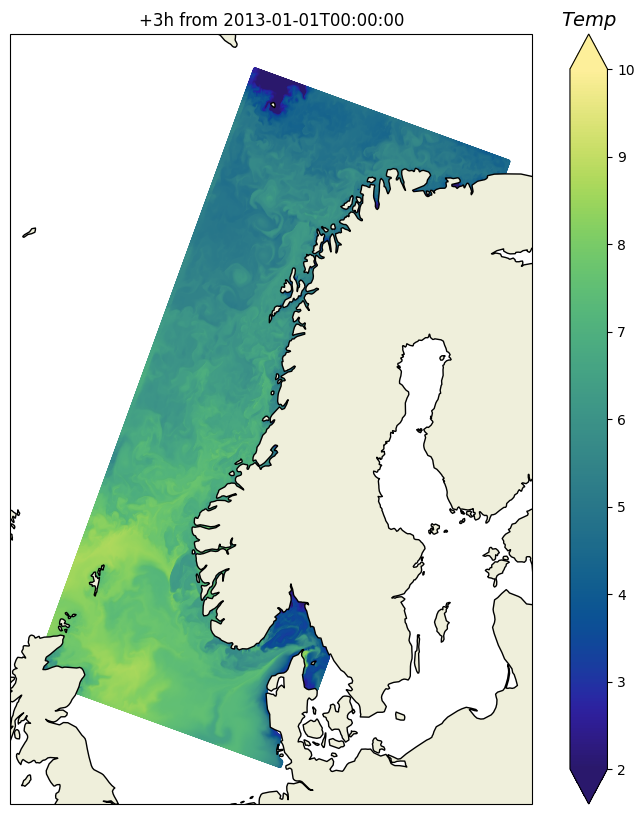

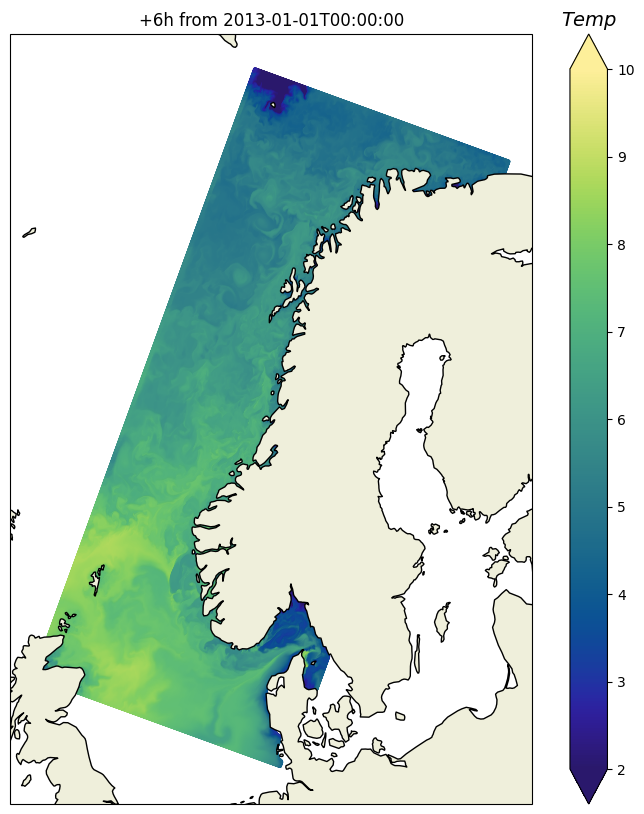

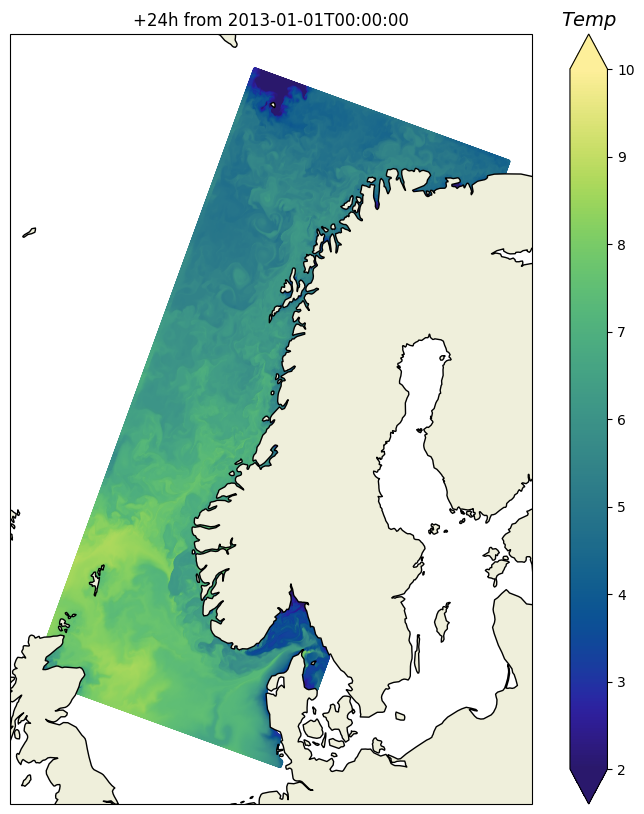

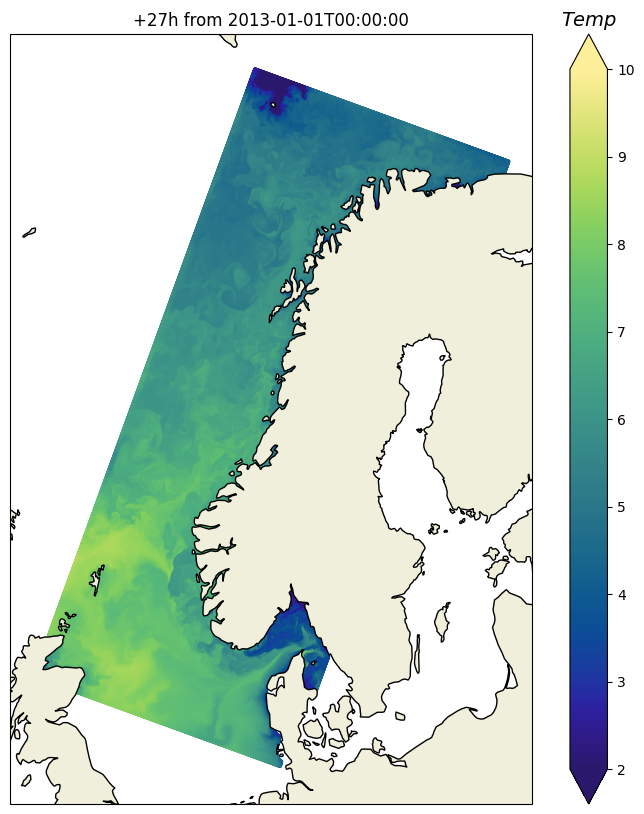

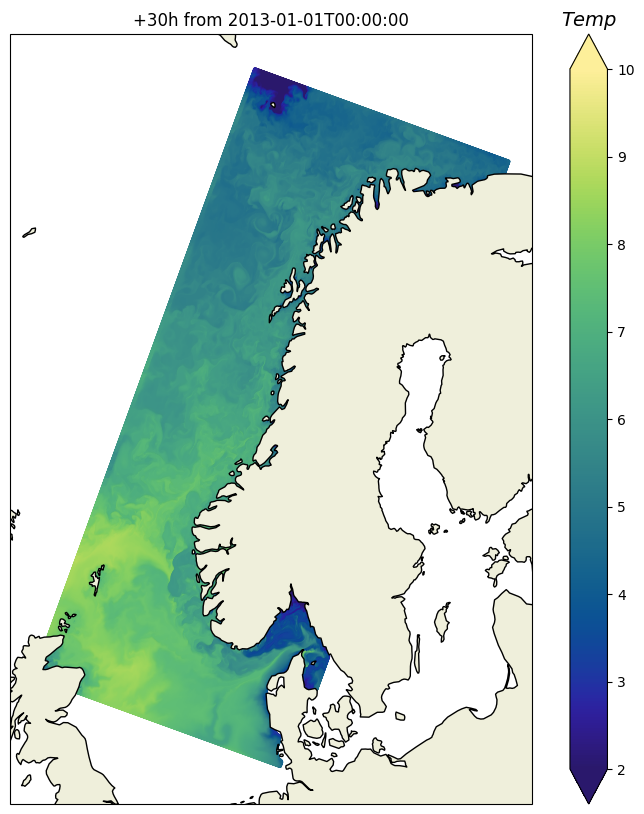

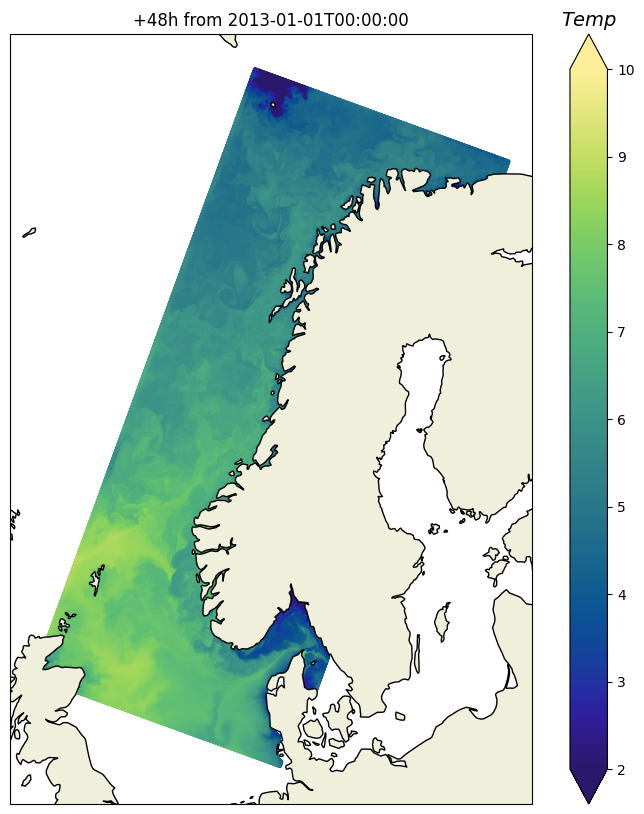

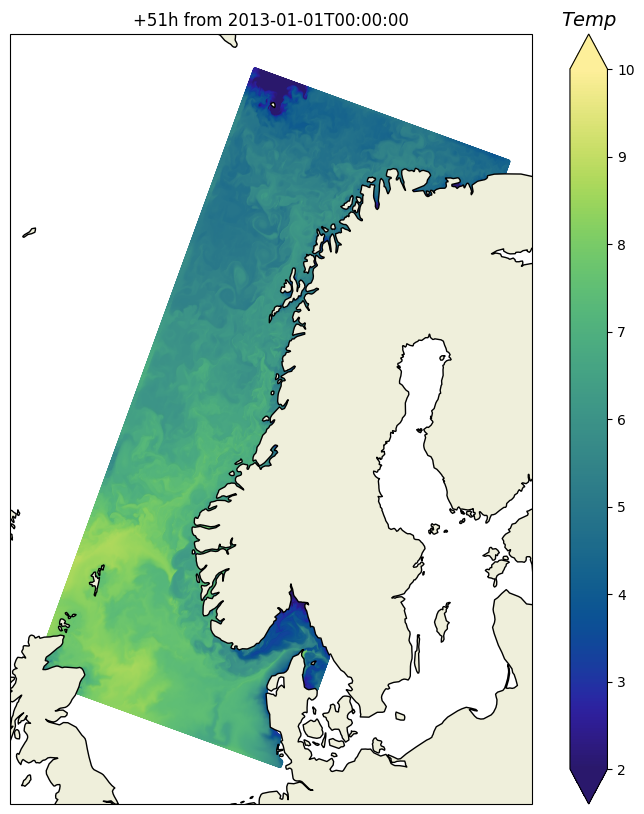

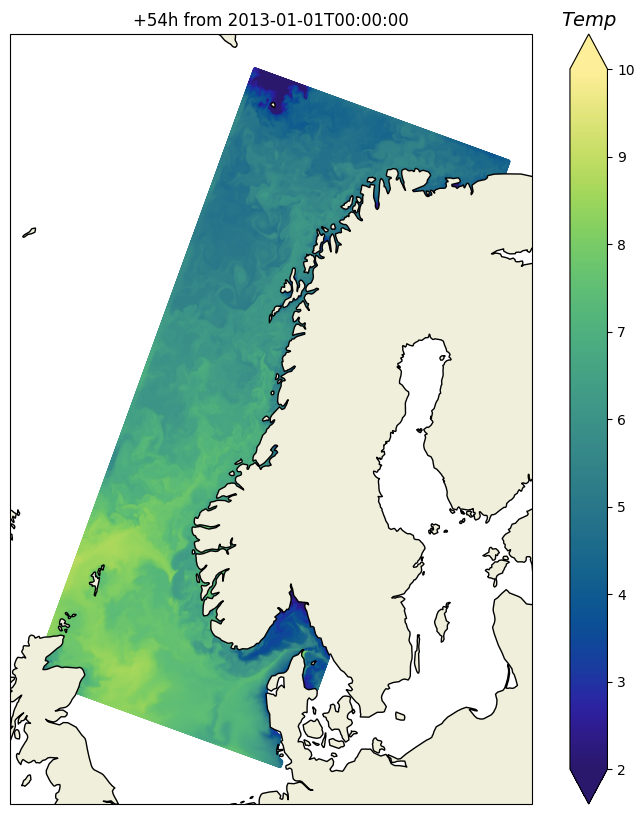

In [ ]:

for i in [0,3,6,24,27,30,48,51,54]:
    fig, ax = plt.subplots(figsize=(15,10), subplot_kw={'projection': ccrs.NorthPolarStereo()})
    im = ax.scatter(ds.longitudes, ds.latitudes, c=ds[i,0,0,:], s=2, vmin=2, vmax=10, cmap=cmocean.cm.haline, transform=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
    cax = fig.add_axes([ax.get_position().x1+0.025, ax.get_position().y0, 0.025, ax.get_position().height])
    cbar = fig.colorbar(im, ax=ax, cax=cax, extend='both')
    cbar.ax.set_title('$Temp$', fontsize=14)
    ax.set_title(f'+{i}h from {year}-01-01T00:00:00')
    plt.savefig(f'{i}.png')

#ax.set_title(f'S {ds.time.values}')